# OPEN SOURCE SOFTWARE MINI PROJECT

# Fake news analysis modelling

Fake news refers to news containing deceptive or fabricated contents that are actually groundless; they are intentionally 
overstated or provide false information. This project module proposes a fake news analysis modelling method to identify a variety of features in terms of spreading information.

# Input/Data set

The data containing news and veracity information of news can be collected from Kaggle, an open data analysis platform at: https://www.kaggle.com/rmisra/news-category-dataset https://www.kaggle.com/mrisdal/fake-news

# Get Tweets

In [ ]:
!pip install nest_asyncio
!pip install twint

In [ ]:
import pandas as pd
import nest_asyncio
import twint

In [ ]:
#UPLOAD THE DATASETS FIRST
fakenews = pd.read_csv(path)
realnews = pd.read_csv(path)

# User Details

In [ ]:
import pandas as pd
import requests
import time
import twint
##pip install --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint

In [ ]:
#Upload Fake tweets and Real tweets dataset
df1 = pd.read_csv("faketweetsfinal.csv")
df = pd.DataFrame(df1["username"].unique().tolist()
for i in df["0"]:
    try:
        c = twint.Config()
        c.Username = str(i)
        c.Custom["id"] = ["name","followers", "following"]
        c.Output = "userfake.csv"
        c.Store_csv = True
        twint.run.Lookup(c)
    except Exception as e:
        print(e)
        print(i)

df2 = pd.read_csv("realtweetsfinal.csv")
df = pd.DataFrame(df2["username"].unique().tolist()
for i in df["0"]:
    try:
        c = twint.Config()
        c.Username = str(i)
        c.Custom["id"] = ["name","followers", "following"]
        c.Output = "userreal.csv"
        c.Store_csv = True
        twint.run.Lookup(c)
    except Exception as e:
        print(e)
        print(i)

# Fake Tweets Visualization

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fake = pd.read_csv('/content/drive/My Drive/Internship/Scrapped Data/faketweetsfinal.csv')

In [ ]:
fake

,date,search,username,tweet,nlikes,nretweets,nreplies,class
0,2018-01-01 09:08:06,Donald Trump Sends Out Embarrassing New Year’...,llovlyldy,@POTUS @WHITEHOUSE @PressSec @VP @GOP Donald T...,0.0,0.0,0.0,0.0
1,2018-01-01 05:27:31,Donald Trump Sends Out Embarrassing New Year’...,DowellBrands,Donald Trump Sends Out Embarrassing New Year’s...,0.0,0.0,0.0,0.0
2,2018-01-01 01:29:58,Donald Trump Sends Out Embarrassing New Year’...,AddInfoOrg,Donald Trump Sends Out Embarrassing New Year’s...,1.0,7.0,1.0,0.0
3,2018-01-03 05:29:18,Drunk Bragging Trump Staffer Started Russian ...,Paulhaider74,Drunk Bragging Trump Staffer Started Russian C...,2.0,1.0,0.0,0.0
4,2018-01-01 13:44:02,Drunk Bragging Trump Staffer Started Russian ...,20_election,Drunk Bragging Trump Staffer Started Russian C...,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
12949,2017-06-02 16:13:56,White House Sinks To New Lows Of Obstruction;...,AddInfoOrg,White House Sinks To New Lows Of Obstruction; ...,8.0,11.0,0.0,0.0
12950,2017-06-03 02:07:54,Trump’s Ego Goes Into Overdrive As He Retweet...,CraigCo62,Trump’s Ego Goes Into Overdrive As He Retweets...,5.0,4.0,1.0,0.0
12951,2017-06-02 18:02:47,Trump’s Ego Goes Into Overdrive As He Retweet...,silverweb_7,Trump’s Ego Goes Into Overdrive As He Retweets...,0.0,1.0,0.0,0.0
12952,2017-06-02 15:51:30,Trump’s Ego Goes Into Overdrive As He Retweet...,jmsexton_,Trump’s Ego Goes Into Overdrive As He Retweets...,4.0,2.0,1.0,0.0


In [ ]:
fake[['nlikes','nretweets','nreplies']].mode()#.plot(kind="bar")

,nlikes,nretweets,nreplies
0,0.0,0.0,0.0


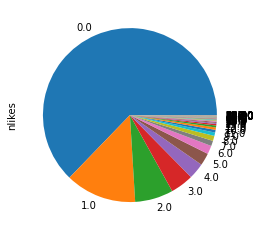

In [ ]:
fake['nlikes'].value_counts().plot(kind='pie')

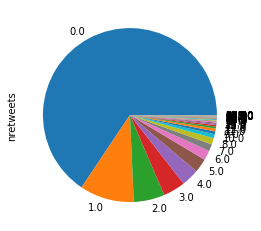

In [ ]:
fake['nretweets'].value_counts().plot(kind='pie')

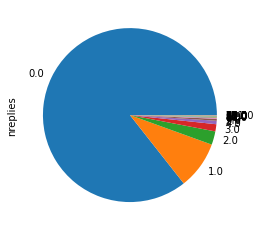

In [ ]:
fake['nreplies'].value_counts().plot(kind='pie')

In [ ]:
fake.iloc[1235,:]

date                                       2017-11-04 23:09:06
search        Former Watergate Prosecutor: Mueller Could Ga...
username                                               thehill
tweet        Former Watergate prosecutor: Mueller could obt...
nlikes                                                     324
nretweets                                                  145
nreplies                                                   101
class                                                        0
Name: 1235, dtype: object

# Real Tweets Visualization 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
real = pd.read_csv('/content/drive/My Drive/Internship/Scrapped Data/realtweetsfinal.csv')

In [ ]:
real

,date,search,username,tweet,nlikes,nretweets,nreplies,class
0,2018-01-02 18:36:39,"As U.S. budget fight looms, Republicans flip t...",c82b5001896b4ae,"As U.S. budget fight looms, Republicans flip t...",1,1,0,1
1,2018-01-02 18:19:22,"As U.S. budget fight looms, Republicans flip t...",TimBrellow,"As U.S. budget fight looms, Republicans flip t...",2,2,0,1
2,2018-01-02 12:53:22,"As U.S. budget fight looms, Republicans flip t...",tomhicksva1,"Dems need to call out Repub hypocrisy, oppose ...",5,3,0,1
3,2018-01-02 12:17:13,"As U.S. budget fight looms, Republicans flip t...",TrickFreee,No way... who'd have predicted that....? 🙄\nAs...,13,9,1,1
4,2018-01-02 03:43:38,"As U.S. budget fight looms, Republicans flip t...",TWD913,"As U.S. budget fight looms, Republicans flip t...",1,1,0,1
...,...,...,...,...,...,...,...,...
29269,2017-04-28 18:36:38,"Trump aims to expand U.S. offshore drilling, d...",UStatesBlues,"Trump aims to expand U.S. offshore drilling, d...",2,1,2,1
29270,2017-04-28 17:41:57,"Trump aims to expand U.S. offshore drilling, d...",RTSProjectEarth,New post: Trump aims to expand U.S. offshore d...,2,3,3,1
29271,2017-04-28 17:26:11,"Trump aims to expand U.S. offshore drilling, d...",RitaLynnLyman,"Can someone please explain this 2 him? ""Trump ...",1,1,0,1
29272,2017-04-28 16:45:22,"Trump aims to expand U.S. offshore drilling, d...",Roodhouse,"""Trump aims to expand U.S. offshore drilling, ...",1,1,0,1


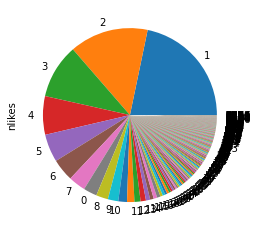

In [ ]:
real['nlikes'].value_counts().plot(kind='pie')

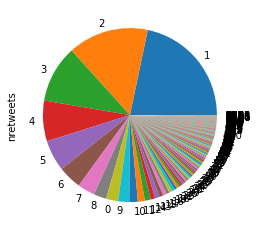

In [ ]:
real['nretweets'].value_counts().plot(kind='pie')

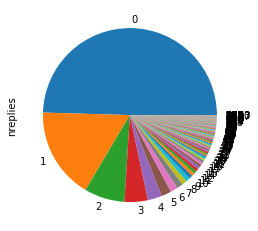

In [ ]:
real['nreplies'].value_counts().plot(kind='pie')

In [ ]:
real['nlikes'].max()

4090

In [ ]:
real['nlikes'].min()

0

In [ ]:
real['nretweets'].max()

2665

In [ ]:
real['nretweets'].min()

0

In [ ]:
real['nreplies'].max()

2127

In [ ]:
real['nreplies'].min()

0

# Tweet Features

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk 
import string
import re
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# Load dataset
real = pd.read_csv("/content/realtweetsfinal.csv")
fake = pd.read_csv("/content/faketweetsfinal.csv")

In [ ]:
real['class'] = 1
fake['class'] = 0
#df  = real.append(fake,ignore_index=True)
#df = df[['username', 'tweet', 'class']]
df = df[['username', 'tweet']]

In [ ]:
user = pd.read_csv("/content/MLPUser.csv")
df = pd.merge(left = user, right=df, on='username', how='inner')

In [ ]:
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'sixteen', 'yearold', 'fu', 'weeks', 'week','treatment', 'associated', 'patients', 'may','day', 'case','old'])

In [ ]:
def remove_punct(text):
    text = re.sub(r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))", '', text)
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

def tokenization(text):
    text = re.split('\W+', text)
    return text

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

def url(text):
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    url = re.findall(regex,text)
    return len(url)

def special(text):
    length = len(text)
    text = remove_punct(text)
    special = length - len(text)
    return special


In [ ]:
df['tweet_punct'] = df['tweet'].apply(lambda x: remove_punct(x))
df['tweet_tokenized'] = df['tweet_punct'].apply(lambda x: tokenization(x.lower()))
df['tweet_nonstop'] = df['tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df['tweet_stemmed'] = df['tweet_nonstop'].apply(lambda x: stemming(x))

In [ ]:
df['tweet_length'] = df['tweet'].apply(len)
df['special'] = df['tweet'].apply(special)
df['url'] = df['tweet'].apply(url)
df['tokens'] = df['tweet_tokenized'].apply(len)
df['nonstop'] = df['tweet_nonstop'].apply(len)
df['stemmed'] = df['tweet_stemmed'].apply(len)

In [ ]:
df.columns

Index(['username', 'tweet', 'class', 'tweet_punct', 'tweet_tokenized',
       'tweet_nonstop', 'tweet_stemmed', 'tweet_length', 'special', 'url',
       'tokens', 'nonstop', 'stemmed'],
      dtype='object')

In [ ]:
real = pd.read_csv('/content/drive/My Drive/Internship/Scrapped Data/realtweetsfinal.csv')
fake = pd.read_csv('/content/drive/My Drive/Internship/Scrapped Data/faketweetsfinal.csv')

# Box Plots

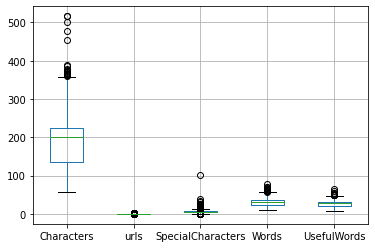

In [ ]:
fake_tweets.boxplot(column = ['Characters', 'urls', 'SpecialCharacters', 'Words', 'UsefulWords'])

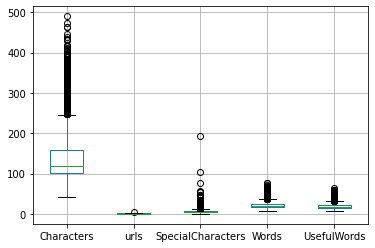

In [ ]:
real_tweets.boxplot(column = ['Characters', 'urls', 'SpecialCharacters', 'Words', 'UsefulWords'])

Characters

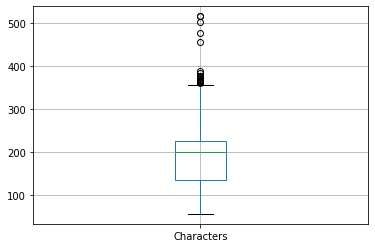

In [ ]:
fake_tweets.boxplot(column = ['Characters'])

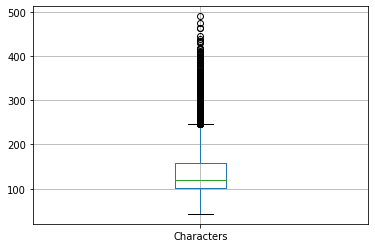

In [ ]:
real_tweets.boxplot(column = ['Characters'])

Useful Words

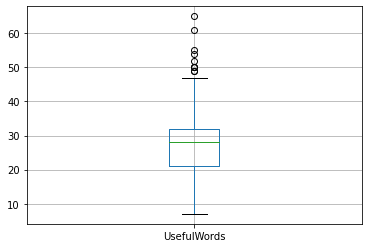

In [ ]:
fake_tweets.boxplot(column = ['UsefulWords'])

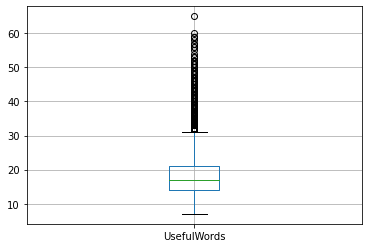

In [ ]:
real_tweets.boxplot(column = ['UsefulWords'])

URLS

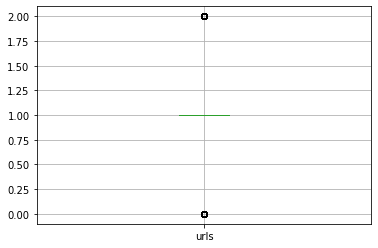

In [ ]:
fake_tweets.boxplot(column = [ 'urls'])

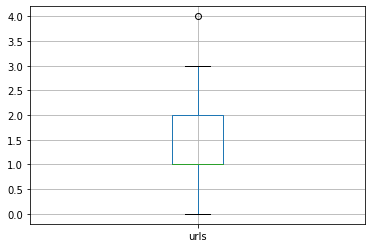

In [ ]:
real_tweets.boxplot(column = [ 'urls'])

Special chaaracters

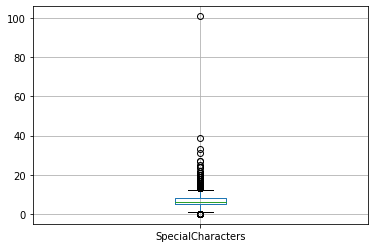

In [ ]:
fake_tweets.boxplot(column = [ 'SpecialCharacters'])

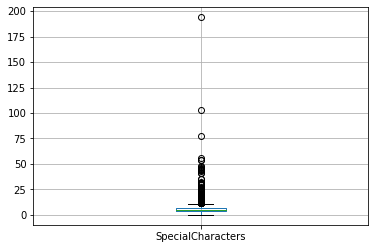

In [ ]:
real_tweets.boxplot(column = [ 'SpecialCharacters'])

Words

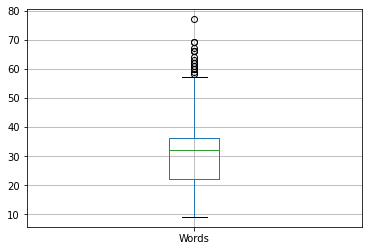

In [ ]:
fake_tweets.boxplot(column = [ 'Words'])

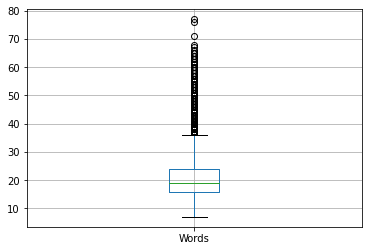

In [ ]:
real_tweets.boxplot(column = [ 'Words'])

# **Models**

## Without Bio

In [ ]:
data = data[['age','tweets','following','followers','likes','media','class']]

In [ ]:
data.head()

,age,tweets,following,followers,likes,media,class
0,4004,40326,2449,1840,57227,1235,0
1,1851,24563,79,16,47,605,0
2,3566,31641,1073,26578,218,7089,0
3,2044,265279,3284,6668,572763,0,0
4,1111,1489,0,722,0,1489,0


In [ ]:
data.groupby("class").describe()

age                            ...   media                    
        count         mean          std  ...     50%      75%        max
class                                    ...                            
0      5695.0  3102.286216   974.607616  ...   288.0  1489.00   830000.0
1      5324.0  3069.697971  1059.301123  ...  1737.0  7079.25  1210000.0

[2 rows x 48 columns]

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
data = shuffle(data)
data.reset_index(inplace=True, drop=True)

In [ ]:
X = data.drop('class',axis=1)
y = data['class']

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=1) 

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(25,20,10), max_iter=500,activation = 'tanh',solver='adam',random_state=1)

In [ ]:
clf.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(25, 20, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
conf_mat= confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[910 229]
 [284 781]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1139
           1       0.77      0.73      0.75      1065

    accuracy                           0.77      2204
   macro avg       0.77      0.77      0.77      2204
weighted avg       0.77      0.77      0.77      2204



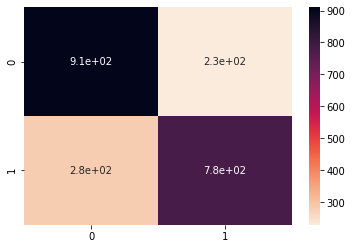

In [ ]:
sn.heatmap(conf_mat, annot=True, cmap="rocket_r")

In [ ]:
acc = conf_mat.trace()/conf_mat.sum()
print("Accuracy: %.2f percent"%(acc*100))

Accuracy: 76.72 percent


## Using Bio

In [ ]:
import re
import string
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
data = data[['age','bio','tweets','following','followers','likes','media','class']]

In [ ]:
data['bio'].isnull().values.sum()

1390

In [ ]:
data.columns

Index(['username', 'age', 'bio', 'tweets', 'following', 'followers', 'likes',
       'media', 'class', 'urls', 'nhashtags', 'bio_length', 'punct',
       'mentions'],
      dtype='object')

In [ ]:
data = shuffle(data)
data.reset_index(inplace=True, drop=True)

In [ ]:
X = data.drop(['class','bio'],axis=1)
y = data['class']

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=1) 

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(25,20,10), max_iter=500,activation = 'tanh',solver='adam',random_state=1)

In [ ]:
clf.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(25, 20, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
conf_mat= confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[928 211]
 [362 703]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      1139
           1       0.77      0.66      0.71      1065

    accuracy                           0.74      2204
   macro avg       0.74      0.74      0.74      2204
weighted avg       0.74      0.74      0.74      2204



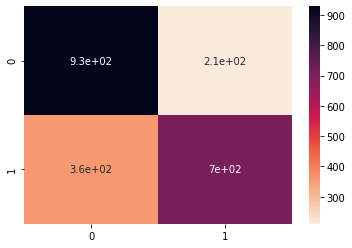

In [ ]:
sn.heatmap(conf_mat, annot=True, cmap="rocket_r")

In [ ]:
acc = conf_mat.trace()/conf_mat.sum()
print("Accuracy: %.2f percent"%(acc*100))

Accuracy: 74.00 percent


## Feature Model

In [ ]:
def model(data):
    y = data['class']
    X = data.drop('class',axis=1)
    min_max_scaler = MinMaxScaler()
    X = min_max_scaler.fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=1) 
    clf = MLPClassifier(hidden_layer_sizes=(30,20,15), max_iter=500,activation = 'relu',solver='adam',random_state=1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    from sklearn.metrics import classification_report, confusion_matrix
    conf_mat= confusion_matrix(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    acc = conf_mat.trace()/conf_mat.sum()
    print("Accuracy: %.2f percent"%(acc*100))
    print(data.columns)

In [ ]:
col = ['tweet_length', 'special', 'url', 'tokens', 'nonstop', 'stemmed']
for i in range(1,len(col)+1):
    temp = ['class']
    for j in range(0,i):
        temp.append(col[j])
    data = df[temp]
    data = data.dropna()
    data = shuffle(data)
    data.reset_index(inplace=True, drop=True)
    model(data)
    print('*'*100)

[[8434 1837]
 [2356 3499]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80     10271
           1       0.66      0.60      0.63      5855

    accuracy                           0.74     16126
   macro avg       0.72      0.71      0.71     16126
weighted avg       0.74      0.74      0.74     16126

Accuracy: 74.00 percent
Index(['class', 'tweet_length'], dtype='object')
****************************************************************************************************
[[9180 1091]
 [ 804 5051]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     10271
           1       0.82      0.86      0.84      5855

    accuracy                           0.88     16126
   macro avg       0.87      0.88      0.87     16126
weighted avg       0.88      0.88      0.88     16126

Accuracy: 88.25 percent
Index(['class', 'tweet_length', 'special'], dtype='object')
**********************************